# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [175]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_studies=pd.merge(study_results,mouse_metadata,how="left")

# Display the data table for preview
mouse_studies.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [176]:
# Checking the number of mice.
len(mouse_studies["Mouse ID"].unique())

249

In [177]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
subset=mouse_studies.loc[mouse_studies["Timepoint"]==0,["Mouse ID","Timepoint"]]
duplicate=subset.loc[subset["Mouse ID"].duplicated()==True,["Mouse ID"]]
dupeID=duplicate["Mouse ID"].unique()
dupeID

array(['g989'], dtype=object)

In [178]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicatedata=mouse_studies.loc[(mouse_studies["Mouse ID"]==dupeID[0]),["Mouse ID","Timepoint","Tumor Volume (mm3)","Metastatic Sites",
                                                                              "Drug Regimen","Sex","Age_months","Weight (g)"]]
duplicatedata

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [179]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_studies=mouse_studies.loc[(mouse_studies["Mouse ID"]!=dupeID[0]),["Mouse ID","Timepoint","Tumor Volume (mm3)","Metastatic Sites",
                                                                              "Drug Regimen","Sex","Age_months","Weight (g)"]]
mouse_studies.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [180]:
# Checking the number of mice in the clean DataFrame.
len(mouse_studies["Mouse ID"].unique())

248

## Summary Statistics

In [181]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
drug_data=mouse_studies.groupby(["Drug Regimen"])
drug_df=pd.DataFrame({
    "Mean Tumor Volume":drug_data["Tumor Volume (mm3)"].mean(),
    "Median Tumor Volume":drug_data["Tumor Volume (mm3)"].median(),
    "Tumor Volume Variance":drug_data["Tumor Volume (mm3)"].var(),
    "Tumor Volume Std. Dev.":drug_data["Tumor Volume (mm3)"].std(),
    "Tumor Volume Std. Err.":drug_data["Tumor Volume (mm3)"].sem()
})
drug_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [182]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
drug_agg=pd.DataFrame(drug_data["Tumor Volume (mm3)"].aggregate(["mean","median","var","std","sem"]))
drug_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen'>

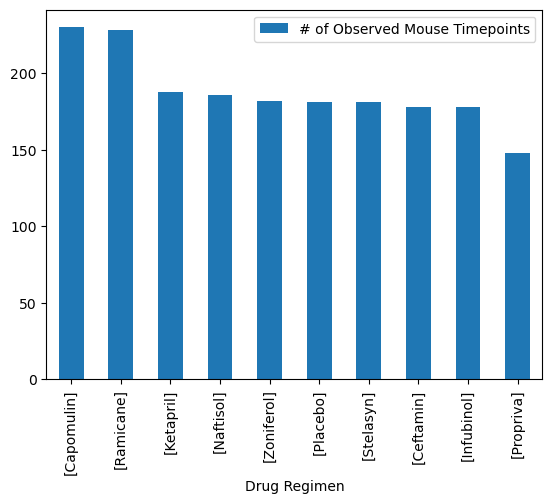

In [183]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_bar=pd.DataFrame({"Drug Regimen":drug_data["Drug Regimen"].unique(),
                         "# of Observed Mouse Timepoints":drug_data["Drug Regimen"].value_counts()
                        })
drug_bar_sorted=drug_bar.sort_values("# of Observed Mouse Timepoints",ascending=False)
drug_bar_sorted.plot.bar(x="Drug Regimen",y="# of Observed Mouse Timepoints")

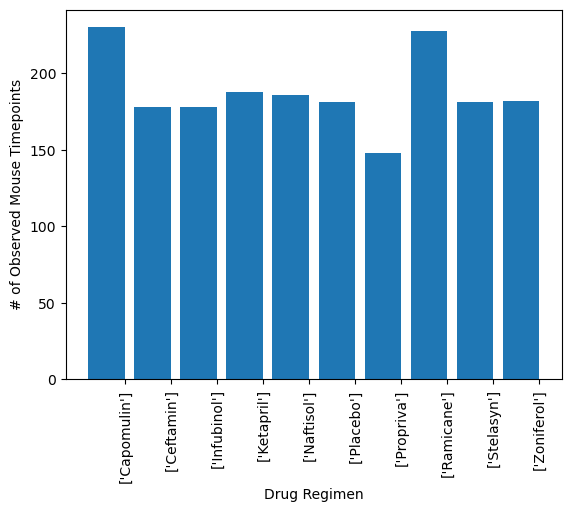

In [184]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
barx=np.arange(len(drug_bar["Drug Regimen"]))
bary=drug_bar["# of Observed Mouse Timepoints"]
tick_locations=[value+0.4 for value in barx]
plt.bar(barx,bary)
plt.xticks(tick_locations,drug_bar["Drug Regimen"],rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

<Axes: ylabel='Sex'>

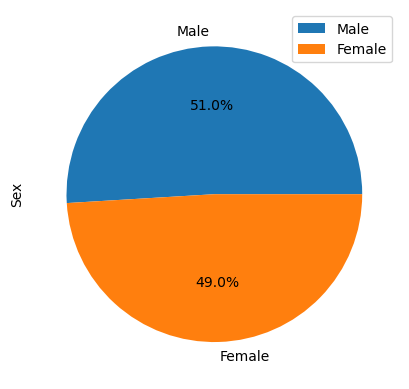

In [185]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_sex=pd.DataFrame({"Sex":mouse_studies["Sex"].unique(),
                        "Sex":mouse_studies["Sex"].value_counts()
                       })
mouse_sex.plot.pie(y="Sex",autopct="%.1f%%")

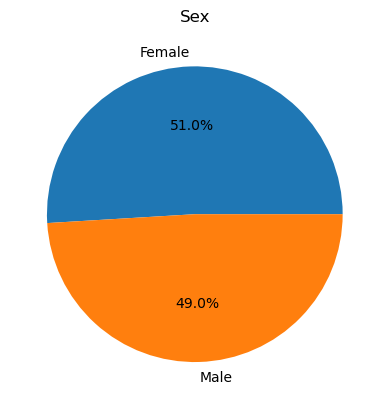

In [186]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_counts=mouse_studies["Sex"].value_counts()
sexes=mouse_studies["Sex"].unique()
plt.pie(sex_counts,labels=sexes,autopct="%.1f%%")
plt.title("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [187]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_times=mouse_studies.groupby(["Mouse ID"])["Timepoint"].max()
mouse_times=mouse_times.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df=mouse_times.merge(mouse_studies,on=['Mouse ID','Timepoint'],how="left")

In [188]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    temp_df=merged_df.loc[merged_df["Drug Regimen"]==drug,"Tumor Volume (mm3)"]

    # add subset 
    tumor_vol.append(temp_df)

    quartiles=temp_df.quantile([.25,.5,.75])
    lowerq=quartiles[.25]
    upperq=quartiles[.75]
    iqr=upperq-lowerq
    lower_bound=lowerq-(1.5*iqr)
    upper_bound=upperq+(1.5*iqr)

    # Determine outliers using upper and lower bounds
    outliers=temp_df.loc[(temp_df<lower_bound)|(temp_df>upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


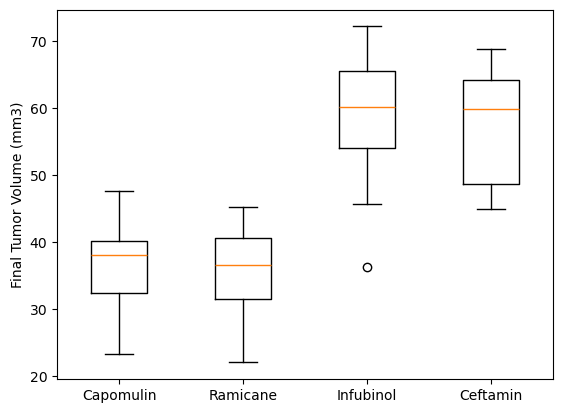

In [189]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1,ax1=plt.subplots()
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(tumor_vol)
plt.xticks(np.arange(len(treatments))+1,treatments)
plt.show()

## Line and Scatter Plots

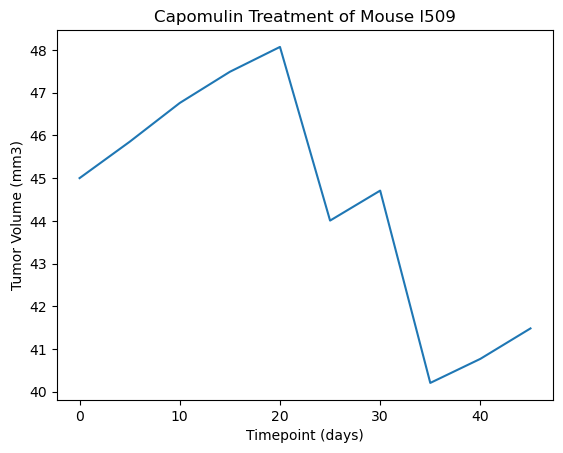

In [190]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data=mouse_studies.loc[mouse_studies["Drug Regimen"]=="Capomulin",["Mouse ID","Timepoint","Tumor Volume (mm3)","Weight (g)"]]
single_mouse_data=capomulin_data.loc[capomulin_data["Mouse ID"]=="l509",["Mouse ID","Timepoint","Tumor Volume (mm3)"]]
linex=single_mouse_data["Timepoint"]
liney=single_mouse_data["Tumor Volume (mm3)"]
plt.plot(linex,liney)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse l509")
plt.show()

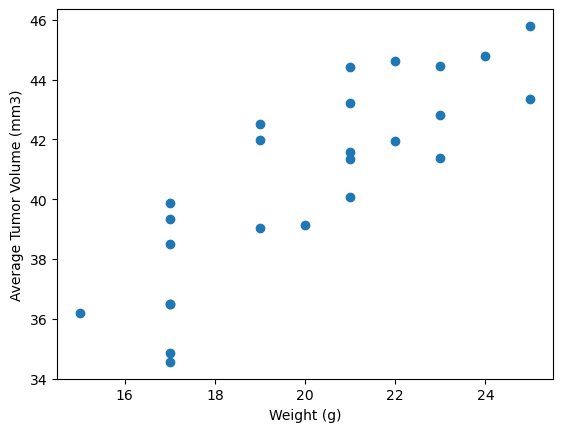

In [191]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_weight=mouse_studies.loc[mouse_studies["Drug Regimen"]=="Capomulin"]
weight_data=capomulin_weight.groupby(["Mouse ID"])[["Weight (g)","Tumor Volume (mm3)"]].mean()
scatterx=weight_data["Weight (g)"]
scattery=weight_data["Tumor Volume (mm3)"]
plt.scatter(scatterx,scattery)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The Correlation between mouse weight and the average tumor volume is PearsonRResult(statistic=0.841936342469472, pvalue=1.3225722434712605e-07)


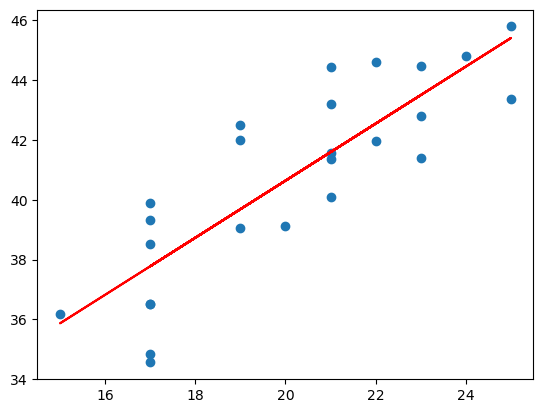

In [174]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
corr=st.pearsonr(scatterx,scattery)
print(f"The Correlation between mouse weight and the average tumor volume is {corr}")

slope,intercept,rvalue,pvalue,stderr=st.linregress(scatterx,scattery)
regress_values=scatterx*slope+intercept
plt.scatter(scatterx,scattery)
plt.plot(scatterx,regress_values,"r-")
plt.show()